In [1]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
import random

In [2]:
lambda1 = 0.01                                   # Decay constant
n_max = 10
time_max = 1000
seed = 68111

number = nloop = n_max                             # Initial value

y = np.zeros(time_max)
t = np.zeros(time_max)


In [3]:
import os

In [4]:
for time in range(0, time_max):                 # Time loop
    
    for atom in range(1, number):              # Decay loop
        decay = random.random()   
        if (decay  <  lambda1):
            nloop = nloop  -  1                  # A decay
            frequency = 600 # Hertz
            duration  = 100 # milliseconds
            os.system('play -n synth %s sin %s' % (duration/1000, frequency))
            
    number  = nloop
    y[time] = nloop
    t[time] = time

In [5]:
print(n_max)

10


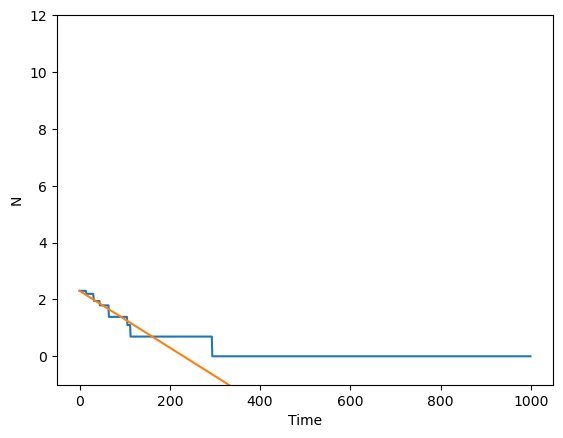

In [6]:
plt.plot(t, np.log(y))    
#plt.title("Spontaneous Decay")

plt.plot(t, np.log(n_max*np.exp(-lambda1*t)))
plt.xlabel("Time")
plt.ylabel("N")

plt.ylim(-1, 12)
plt.show()